-----

<img src='http://localhost:8888/files/m2_%EB%B6%84%EC%84%9D%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%ED%99%9C%EC%9A%A9/Pandas/dataset/%EB%AA%A9%ED%91%9C.jpg' STYLE='width:500px;'>

--------------------

## '목표 달성! 공부 도우미' (목공도) 프로그램은 ...
#### 목표 달성을 위한 공부 시간을 효율적으로 쓸 수 있게 도와주는 프로그램입니다.

#### 시험 공부를 하는 학생, 수험생 그리고 틈틈히 자격증 공부를 하는 직장인에게 
#### 도움을 줄 수 있는 시간 관리 서비스를 제공하고 있습니다. 

## 목공도의 기대 가치는?
#### - 체계적인 시간 관리
#### - 집중력 향상
#### - 공부 효율성 36% ↑ (연구자료: 2021, An analysis of productivity app strengths: An environmental scan)

## 목공도의 서비스는?
#### - 목표 성공시 자신에게 말해주고 싶은 메모 기능 (성공시 알림이 뜹니다. )
#### - 공부 스톱워치 및 휴식 온/오프 기능 
#### - 공부 자극 '오늘의 공부 명언' 서비스 
#### - 과거 날짜별 공부 및 휴식 그래프 
#### - 과거와 현재 목표 내역 및 남은 날짜&공부시간 계산, 성공/실패 여부

##  목공도 프로그램 메뉴:
    
    1. 목표 정의
       1.1 목표 사항 
           1.1.1 목표 제목
           1.1.2 목표 메모
           1.1.3 목표 날짜
           1.1.4 목표 공부량 (분 단위)
       
    2. 공부 스톱워치
       2.1 스톱워치 시작 
       2.2 휴식 온/오프
       2.3 스톱워치 종료
       
    3. 목표 리스트 
       3.1  목표 제목
       3.2  목표 총 공부한 시간 (분 단위)
       3.3  성공/실패 여부
       3.4  날짜 
       3.5  디데이
       3.6  디타임
       
    4. 공부와 휴식 그래프 
       4.1 날짜별 공부 시간 
       4.2 날짜별 휴식 시간 
       4.3 하루 평균 공부 시간
       4.4 하루 평균 휴식 시간

--------------

In [1]:
import os
from datetime import datetime
import time
import pandas as pd
import datetime
from datetime import datetime 
from datetime import timedelta
import matplotlib.pyplot as plt
import glob
import re
import random

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# 프로그램 관련 파일들은 전부 aim_list 에 넣습니다.
os.getcwd()
os.chdir("C:\\Cakd7\\aim_list")
os.getcwd()

'C:\\Cakd7\\aim_list'

# 1. 목표 정의

## 1.1 목표 사항 

#### 1.1.1 목표 제목

####   1.1.2 목표 메모
       
####   1.1.3 목표 날짜
       
####   1.1.4 목표 공부량 (분 단위)

Aim 클래스에서 위와 같이 목표를 정의할 수 있다. 

 1. Aim의 객체를 만들 때 제목,메모,날짜,공부량을 기재한후 함수를 실행시킨다.
 2. init 함수가 변수를 각각 받은 후, save_aim 함수를 부른다. 
 3. save_aim 함수는 입력한 목표 사항을 저장할 것 인지 물어본다. 승인하면 정보를 딕셔너리에 정리한 후 새 txt 파일에 저장한다. 
    딕셔너리 key는 4개이다 (목표,메모,날짜,목표_공부량)
 4. test.start_aim 함수를 실행해서 실행한 날짜부터 카운트다운이 시작된다. 
    설정한 목표 날짜까지 날짜별로 총 공부시간과 휴식시간을 저장하는 빈 데이터프레임을 만든다. 

In [3]:
class Aim():
    
    global time_df 
    global today
    global start_study_time
    
    today = datetime.now().strftime('%Y/%m/%d')
    study_pause_records = {}
    
    def __init__(self, title, memo, ddate, studytime): # 목표 제목, 메모, 날짜, 목표 공부량을 받습니다.
        self.title = title
        self.memo = memo
        self.ddate = ddate
        self.studytime = studytime
        
        # 입력한 내용을 다시 한번 확인합니다. 
        print(f'''                              
        
        입력하신 정보:
        
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        목표: {self.title}
        성공 메모: {self.memo}
        날짜(yyyy/mm/dd): {self.ddate}
        목표 공부량(분): {self.studytime}
        
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        ''')
        
        Aim.save_aim(self) # 목표 저장 여부를 묻습니다.
        
        
    def save_aim(self): # init 에서 연결지어 실행됩니다.

        aim_dict = {'목표': 'txt' , '메모': 'txt', '날짜': 'txt', '목표_공부량': 0}
        
        y_n = input(f">> 목표를 저장하시겠습니까? ( Y / N )\n") # 입력한 목표 저장 여부를 묻습니다.
        
        if y_n == "Y" or y_n =='y':
            
            # 만든 aim_dict 딕셔너리에 기재된 정보를 넣습니다.
            aim_dict["목표"] = {self.title}
            aim_dict["메모"] = {self.memo}
            aim_dict["날짜"] = {self.ddate}
            aim_dict["목표_공부량"] = {self.studytime}
            
            with open( f'{self.title}.txt' ,"w") as f: # 새 txt 파일을 만들어 정보를 지정된 폴더에 저장합니다.
                
                for i,j in aim_dict.items():
                    f.write(f'{i} : {j} \n')
                    
                print(">> 저장 완료되었습니다.\n")
                
        elif y_n == "N" or y_n =='n':
            
            print(">> 저장 실패하였습니다.\n")
            
        else :
            
            print(">> Y / N 중 둘중에 하나만 선택해주세요.\n")
            Aim.save_aim(self) # 재귀함수: 잘못된 입력으로 저장 여부를 다시 묻습니다.
                
    
    def create_time_df(self): # 날짜별 공부/휴식 시간 저장할 빈 데이터프레임 만드는 함수
        
        ddate = datetime.strptime(self.ddate,'%Y/%m/%d')
        date_diff = ddate - datetime.now()
        date_diffdays = date_diff.days
        
        time_df = pd.DataFrame(index = ['휴식','공부']) # 데이터프레임 행은 총 2개
        for i in range(date_diffdays+1): # 열 인덱스 0인 오늘부터 마지막 열 인덱스인 지정한 목표 날짜까지의 모든 날짜들이 df 열
            date_delta = timedelta(days=i) 
            day = datetime.now()+ date_delta
            day = day.strftime('%Y/%m/%d')
            time_df[day] = 0 # 새 열을 만들 때 마다 디폴트 값을 임의로 넣어준다. 
        
        time_df.to_csv(f'{self.title}.csv') 
    
    
    def start_aim(self): # 목표 시작 여부를 묻습니다.
        y_n = input(f">> {self.title} 공부 프로세스를 오늘부로 시작하겠습니까? ( Y / N )\n")
        
        if y_n == "Y" or y_n =='y':
            print(">> 시작...!\n")
            
            Aim.create_time_df(self) # 여기서 create_time_df 함수를 부른다.
            
        elif y_n == "N" or y_n =='n':
            print(">> 다음에...\n")
            
        else :
            print(">> Y / N 중 둘중에 하나만 선택해주세요.\n")
            Aim.start_aim(self) # 잘못된 입력으로 다시 시작 여부를 묻습니다. 
    

# 2. 공부 스톱워치 

#### 2.1 스톱워치 시작 (def start_study)

#### 2.2 휴식 온/오프 (def start_pause)

#### 2.3 스톱워치 종료 (def stop_study)

1. Stopwatch 클래스의 객체를 만들어 오늘 이용할 공부 스톱워치를 연다. 
2. start_study 함수를 실행시키면 공부 스톱워치가 시작된다.
   여기서 저장된 공부 명언들 중 랜덤으로 하나가 출력된다.
4. start_pause 함수는 휴식 시간을 정할 수 있다. 휴식은 원하는 만큼 가질 수 있고, 누적된 휴식 시간은 데이터프레임에 업데이트된다.
5. stop_study 함수는 공부 스톱워치를 종료시킨다. 공부를 마친 시간에서 공부 시작시간을 빼면 총 공부 시간이 계산 되는데 그 사이에 가진 
   휴식 시간을 차감한다.
6. 총 공부 시간을 데이터 프레임에 저장한다.

 time.sleep() 을 이용하여 스톱워치 기능을 재현합니다.  

In [4]:
class Stopwatch():
    
    def __init__(self, title): 

        global studytime
        global today
        
        self.title = title
        
        with open( f'{self.title}.txt' ,"r") as f: #목표 공부량 읽어오기
            
            lines = f.readlines()
            studytime = lines[3]
            
            p = re.compile('\d+') 
            studytime = p.findall(studytime)  #수정 필요!! finadall 대체하기...
            studytime = studytime[0]
    
                       
                       
    # 공부 스톱워치를 시작합니다. 
    def start_study(self): 
        global start_study_time
        
        print(">> 공부를 스톱워치를 시작하겠습니다.\n")
        start_study_time = datetime.now() #공부 시작한 시간을 가져옵니다.
                       
                       
        print("☆★☆ 오늘의 명언 ☆★☆\n") # 하루에 명언 한개
        print('-----------------------------------------------------------\n')
        
        os.chdir("C:\\Cakd7\\aim_list\\공부명언")  
        with open( 'quotes.txt' ,"r",encoding="UTF-8") as f:
            quotes=f.readlines()
            random_number = random.randint(0, 9) # 랜덤으로 공부 명언을 뽑습니다. 명언 수는 정해져 있습니다.
            print(quotes[random_number])
        os.chdir("C:\\Cakd7\\aim_list")
        
        print('-----------------------------------------------------------\n')
        
    
    # 휴식 알람을 시작합니다.
    def start_pause(self): 
        
        print(">> 현재 시간은", datetime.now().strftime('%Y/%m/%d %H:%M:%S'), "입니다. \n")
        pause_result = int(input(">> 몇분의 휴식을 원하시나요? \n")) 
    
    
        start_pause_time = datetime.now()
        start_pause_time1 = datetime.now().strftime('%H:%M:%S') # 아래 프린트에서 더 깔끔하게 보여주기 위해
        print(f'>> {start_pause_time1} 부터 {pause_result} 분간 휴식이 있겠습니다.\n')
        
        
        time.sleep(int(pause_result)*60) # 초에서 분 단위로 바꿔준다.
        
        
        end_pause_time = datetime.now()
        print(">> 휴식이 끝났습니다. 공부를 다시 이어가세요! \n") # 주어진 휴식 시간이 끝나면 알람을 받습니다.
        
        
        # 휴식을 가질 때마다 데이터프레임에 누적된 휴식시간을 업데이트 해줍니다.
        time_dff = pd.read_csv(f'{self.title}.csv',index_col=0)
        
        expause = time_dff.loc['휴식',today]
        newpause = expause + pause_result
        
        time_dff.loc['휴식',today] = newpause
        time_dff.to_csv(f'{self.title}.csv')
                       
    
    # 스톱워치 종료
    def stop_study(self):
        print(">> 공부 스톱워치를 종료합니다. \n")
        stop_study_time = datetime.now() # 종료한 시간을 읽어옵니다.
        
        time_dff = pd.read_csv(f'{self.title}.csv',index_col=0)
        
        pause_sum = time_dff.loc['휴식',today] # 데이터프레임에서 총 휴식 시간을 읽어옵니다.
        
        
        temp_total_studytime =stop_study_time - start_study_time
        temp_total_studytime = (temp_total_studytime.seconds)/60 # 분단위로 바꿉니다.
        total_studytime= temp_total_studytime - pause_sum 
        
        time_dff2 = time_dff.copy()
        time_dff2.loc['공부',today] = total_studytime
        time_dff2.to_csv(f'{self.title}.csv') # 총 공부 시간 저장

        print("오늘 총 공부 시간:\n")
        print(f'{round(total_studytime,2)} 분 입니다.')
    
        
        # 목표 공부량을 채우면 성공 알람이 뜹니다.
        if time_dff.iloc[1,:].sum() >= int(studytime): # 실제 공부량이 목표 공부량과 같거나 크다면 성공 메모와 함께 알람이 뜹니다.
            
            print("⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑\n")
            
            print(">> 목표 공부량을 해냈습니다. 축하드립니다!(짝짝)")
            with open( f'{self.title}.txt' ,"r") as f:  # 성공메모 꺼내오기
                lines = f.readlines()
                memo = lines[1]
                print(memo)
                
            print("⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑⁑\n")
    

# 3. 목표 리스트

#### 3.1  목표 제목
   
#### 3.2  목표
   
#### 3.3  목표 총 공부한 시간 (분)
   
#### 3.4  성공/실패 여부
   
#### 3.5  디데이 
   
#### 3.6  디타임: 목표 공부량까지 남은 시간 (분)

1. aim_list 폴더에 있는 모든 txt 파일을 불러옵니다. 
2. 목표 csv 파일에서 실제 공부했던 시간을 읽어옵니다.
3. txt 파일에서 목표 공부량과 목표 날짜를 불러옵니다.
4. 목표 공부량이 실제 공부량보다 클 경우 = 실패, 그렇지 않을 경우 = 성공
6. 위에서 구한 모든 정보들을 데이터프레임으로 정리합니다.

In [5]:
class Aim_list():
    
    def __init__(self):
        
        aim_list = list(glob.glob('*.txt'))
        
        temp_study_live = []
        temp_study_aim = []
        temp_leftstudytime = []
        date_study = []
        days_left = []
        

        for i in aim_list: 
    
            i = i[:-4] #뒤에 .txt 없애기
            
            df = pd.read_csv(f'{i}.csv', index_col=0) # 목표 마다 실제 공부량 읽어오기
            total_study_time = df.iloc[1].sum()
            temp_study_live.append(round(total_study_time,2))
            
            
            with open( f'{i}.txt' ,"r") as f:  # 목표 마다 목표 공부량 읽어오기
                lines = f.readlines()
                study_time_aim = lines[3]
                
                p = re.compile('\d+') # 4번째 줄에서 숫자만 추출 
                study_time_aim = p.findall(study_time_aim)
                study_time_aim= int(study_time_aim[0])
                

                if int(study_time_aim) >= total_study_time: # 실제 공부량과 목표 공부량 비교하기
                    success_fail = '실패' # 목표 공부량을 아직 못 채웠으면 실패
                else:
                    success_fail = '성공' # 목표 공부량을 채웠거나 넘으면 성공
                    
                temp_study_aim.append(success_fail) # 목표별 성공 여부만 저장합니다.
                
                
                #디타임 계산
                leftstudytime = int(study_time_aim) - total_study_time
                temp_leftstudytime.append(leftstudytime)
                
                
            
            with open( f'{i}.txt' ,"r") as f:  # 목표별 날짜 읽어오기
                
                lines = f.readlines()
                dday = lines[2]
                
                p = re.compile('\d+/\d+/\d+') # 날짜만 추출 
                dday = p.findall(dday)
                dday = dday[0]
                dday= datetime.strptime(dday,'%Y/%m/%d')

                    
                date_study.append(dday)
                days_left.append((dday- datetime.now()).days) # 오늘로부터 날짜까지 남은 시간 = 디데이
                

        # 목표 리스트를 데이터프레임으로 보여줍니다. 
        column_names = ['목표 제목','총 공부 시간(분)','성공/실패','목표 날짜','디데이(D-Day)','디타임(D-Time)']
        aim_df = pd.DataFrame(columns= column_names)
        
        x=0
        while x < len(aim_list):    
            
            aim = [aim_list[x][:-4], temp_study_live[x],temp_study_aim[x],date_study[x], days_left[x],temp_leftstudytime[x]]
            aim_sr = pd.Series(aim,index=column_names)
            aim_df= aim_df.append(aim_sr, ignore_index=True)
            
            x+=1
            
        print(aim_df)


# 4. 공부와 휴식 그래프 
#### 4.1 날짜별 총 공부 시간 

#### 4.2 날짜별 총 휴식 시간 

- 날짜별 과거 공부 시간과 휴식 시간을 한눈에 볼 수 있게 그래프로 표현합니다.

In [6]:
class Study_graph():

    today = datetime.now().strftime('%Y/%m/%d')
    
    
    def __init__(self,title):
        self.title = title
        time_dff = pd.read_csv(f'{self.title}.csv',index_col=0)
        
        plt.title(label=f"STUDY / BREAK",fontsize=25, color="black")
        
        pause_line = time_dff.loc["휴식",:]
        study_line = time_dff.loc["공부",:] 

        pause_line.plot.line()
        study_line.plot.line()
        
        #오늘 인덱스
        today_index = time_dff.columns.get_loc(today)
        print(today_index)
        print(today)

        
        print("하루 평균 휴식 시간:")
        print(round(sum(pause_line) / (today_index+1)),"분")
        print("하루 평균 공부 시간:")
        print(round(sum(study_line) / (today_index+1)),"분") 

----

# 프로그램 시나리오 

실제 프로그램을 사용하는 것 처럼 시나리오를 짜서 연출을 합니다.

취준생 A는 토익 시험을 한달(30일) 앞두고 공부할 계획을 세웁니다. 매일 목공도 프로그램을 사용하면서 공부를 하려고 합니다.

 - 새 목표를 정의합니다.
 - 목표 카운트다운을 시작합니다.
 - 오늘 공부 스톱워치를 실행합니다.
 - 두번의 휴식을 갖습니다.
 - 공부를 마칩니다.
 
 
 새 목표의 지정된 날짜까지 목표 공부량을 다 채웠다는 가정을 세워봅니다.
 
 - 목표 리스트를 열어봅니다.
 - 오늘 공부한 목표 공부/휴식 그래프를 확인합니다.
 - 프로그램을 종료합니다. 


        
        ~ 목표달성! 공부도우미 메뉴 ~
        
        1. 새 목표 만들기
        
        2. 오늘의 공부 스톱워치 
        
        3. 목표 목록 보기
        
        4. 공부 & 휴식 그래프 확인하기 
        
        5. 프로그램 종료하기 
        
        
>> 무엇을 하시겠습니까?
1
>> 새 목표는 무엇입니까?토익시험
>> 토익시험 목표를 완수했을 때 자신에게 하고 싶은 말이 있으신가요?
여행가자 끝나고
>> 토익시험의 날짜를 yyyy/mm/dd 으로 입력해 주세요!
2022/07/15
>> 목표 공부량을 분 단위로 입력해 주세요!
3000
                              
        
        입력하신 정보:
        
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        목표: 토익시험
        성공 메모: 여행가자 끝나고
        날짜(yyyy/mm/dd): 2022/07/15
        목표 공부량(분): 3000
        
        ☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰☰
        
        
>> 목표를 저장하시겠습니까? ( Y / N )
1
>> Y / N 중 둘중에 하나만 선택해주세요.

>> 목표를 저장하시겠습니까? ( Y / N )
y
>> 저장 완료되었습니다.

>> 토익시험 공부 프로세스를 오늘부로 시작하겠습니까? ( Y / N )
y
>> 시작...!


        
        ~ 목표달성! 공부도우미 메뉴 ~
        
        1. 새 목표 만들기
        
        2. 오늘의 공부 스톱워치 
        
        3. 목표 목록 보기
        
        4. 공부 & 휴식 그래프 확인하기 
        
        5. 프로그램 종료

C:\Users\admin\AppData\Local\Temp\ipykernel_4336\1650956831.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aim_df= aim_df.append(aim_sr, ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_4336\1650956831.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aim_df= aim_df.append(aim_sr, ignore_index=True)


      목표 제목 총 공부 시간(분) 성공/실패                목표 날짜 디데이(D-Day) 디타임(D-Time)
0  빅데이터분석기사       2255    성공  2022-07-20 00:00:00         15          -5
1      토익시험       0.85    실패  2022-07-15 00:00:00         10     2999.15

        
        ~ 목표달성! 공부도우미 메뉴 ~
        
        1. 새 목표 만들기
        
        2. 오늘의 공부 스톱워치 
        
        3. 목표 목록 보기
        
        4. 공부 & 휴식 그래프 확인하기 
        
        5. 프로그램 종료하기 
        
        
>> 무엇을 하시겠습니까?
4
0. 빅데이터분석기사
1. 토익시험
>> 어떤 목표 그래프를 보시겠습니까?
0
15
2022/07/04
하루 평균 휴식 시간:
66 분
하루 평균 공부 시간:
141 분

        
        ~ 목표달성! 공부도우미 메뉴 ~
        
        1. 새 목표 만들기
        
        2. 오늘의 공부 스톱워치 
        
        3. 목표 목록 보기
        
        4. 공부 & 휴식 그래프 확인하기 
        
        5. 프로그램 종료하기 
        
        
>> 무엇을 하시겠습니까?
5
목공도 프로그램을 종료하겠습니다.


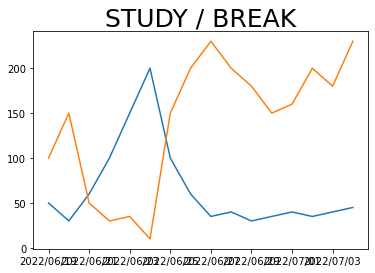

In [7]:
class Menu():
    
    def __init__(self):
        print('''
        
        ~ 목표달성! 공부도우미 메뉴 ~
        
        1. 새 목표 만들기
        
        2. 오늘의 공부 스톱워치 
        
        3. 목표 목록 보기
        
        4. 공부 & 휴식 그래프 확인하기 
        
        5. 프로그램 종료하기 
        
        ''')
        
        #입력 오류를 체크합니다.
        try:
        
            answer = int(input(">> 무엇을 하시겠습니까?\n"))
            
        except :
            print("입력 오류 : 숫자 1-5번 사이에 원하시는 메뉴를 다시 입력해 주세요.\n")
            Menu.__init__(self)
            
        
        if answer == 1 :
            
            title = input(">> 새 목표는 무엇입니까?")
            memo = input(f">> {title} 목표를 완수했을 때 자신에게 하고 싶은 말이 있으신가요?\n")
            date = input(f">> {title}의 날짜를 yyyy/mm/dd 으로 입력해 주세요!\n")
            aim_time = input(f">> 목표 공부량을 분 단위로 입력해 주세요!\n")
            
            result = Aim(title,memo,date,aim_time) 
            result.start_aim()
            Menu.__init__(self) # 다시 메뉴로 돌아가기 
            
            
        elif answer == 2 :
            
            aim_title_list = list(glob.glob('*.txt'))
            for index, title in enumerate(aim_title_list):
                print(f"{index}. {title}")
                
            aim_index = int(input(">> 어떤 목표 스톱워치를 시작하시겠습니까?\n"))
            aim_title = aim_title_list[aim_index]
            aim_title = aim_title[:-4] # str에서 .txt 삭제하기
            #스톱워치 실행 
            result = Stopwatch(aim_title) 
            result.start_study() 
            
            while True: #스톱워치가 켜져있는 동안 계속 loop가 실행된다. 
                option = int(input("휴식을 원하시면 1번 , 스톱워치 종료는 2번을 입력해 주세요.\n"))
                if option == 1:
                    result.start_pause()
                    
                elif option == 2:
                    result.stop_study()
                    break # while문에서 나온다. 
                    
            Menu.__init__(self) # 다시 메뉴로 돌아가기
            

        elif answer == 3 :
            
            result = Aim_list()
            
            Menu.__init__(self) # 다시 메뉴로 돌아가기
            
            
        
        elif answer == 4 :
            
            aim_title_list = list(glob.glob('*.txt'))
            for index, title in enumerate(aim_title_list):
                print(f"{index}. {title[:-4]}")
                
            aim_index = int(input(">> 어떤 목표 그래프를 보시겠습니까?\n"))
            aim_title = aim_title_list[aim_index]
            aim_title = aim_title[:-4] # str에서 .txt 삭제하기
            
            result = Study_graph(aim_title)
        
            Menu.__init__(self) # 다시 메뉴로 돌아가기
            
            
        elif answer == 5 : 
            
            print("목공도 프로그램을 종료하겠습니다.")
            
            
        else :
            
            print("입력 오류: 숫자 1-5번 사이에 원하시는 메뉴를 다시 입력해 주세요.\n")
            Menu.__init__(self)
            
Menu()

# 